WEIGHTED GRAPHS

In [12]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def createWeightedRandomGraph(size, edgeProb, minV=1, maxV=100, seed=123):
    G = nx.Graph()
    G.add_nodes_from(list(range(size)))
    random.seed(seed)
    graph = [[None]*size for _ in range(size)]

    for i in range(size):
        for j in range(i, size):
            if i == j or random.randint(0,100) > edgeProb:
                continue

            w = random.randint(minV,maxV)

            graph[i][j] = w
            graph[j][i] = w
            i1, i2 = [i,j] if  i < j else [j,i]

            G.add_edge(i1,i2, weight=w)
    
    return graph, G

[[None, None, 78, None, 72, None, None, None, None, None],
 [None, None, None, 74, 12, 55, None, 43, None, 19],
 [78, None, None, None, None, None, None, None, None, None],
 [None, 74, None, None, None, None, None, None, None, None],
 [72, 12, None, None, None, 59, 47, None, 60, None],
 [None, 55, None, None, 59, None, None, None, None, None],
 [None, None, None, None, 47, None, None, 86, None, None],
 [None, 43, None, None, None, None, 86, None, None, 70],
 [None, None, None, None, 60, None, None, None, None, None],
 [None, 19, None, None, None, None, None, 70, None, None]]

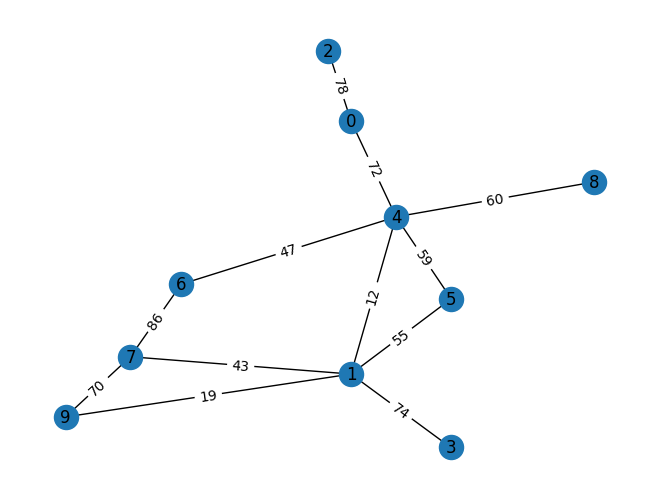

In [13]:
graph1, G1 = createWeightedRandomGraph(10, 25, 1, 100, 346)
pos = nx.spring_layout(G1)
elabels=nx.get_edge_attributes(G1, "weight")
nx.draw(G1, with_labels=True, pos = pos)
nx.draw_networkx_edge_labels(G1,pos, edge_labels=elabels)
graph1

[[None, None, 78, None, 72, None, None, None, None, None],
 [None, None, None, 74, 12, 55, None, 43, None, 19],
 [78, None, None, None, None, None, None, None, None, None],
 [None, 74, None, None, None, None, None, None, None, None],
 [72, 12, None, None, None, 59, 47, None, 60, None],
 [None, 55, None, None, 59, None, None, None, None, None],
 [None, None, None, None, 47, None, None, 86, None, None],
 [None, 43, None, None, None, None, 86, None, None, 70],
 [None, None, None, None, 60, None, None, None, None, None],
 [None, 19, None, None, None, None, None, 70, None, None]]

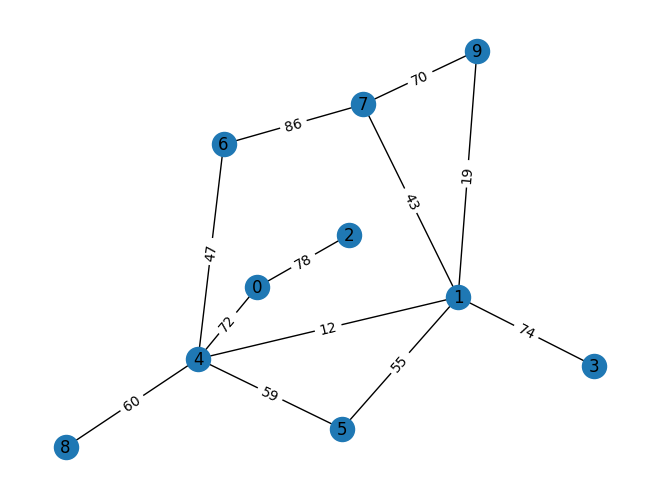

In [14]:
graph, G = createWeightedRandomGraph(10, 25,1,100, 346)
pos = nx.spring_layout(G)
elabels=nx.get_edge_attributes(G, "weight")
nx.draw(G, with_labels=True, pos = pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels=elabels)
graph

MINIMUM SPANNING TREE

Prim's Algorithm

In [53]:
def Prim_yo(graph, start):
    MST = [start]
    size = len(graph)
    newedges = []
    sum = 0
    while len(MST)<size:
        #print(MST)
        last = MST[-1]
        
        for i in range(size):
        
            if (i not in MST) and (graph[last][i] != None):
                newedges.append([last, i, graph[last][i]])
        index = 0
        for j in range(len(newedges)):
            if newedges[j][2] < newedges[index][2]:
                index = j
        #print(newedges)
        if newedges[index][1] not in MST:
            MST.append(newedges[index][1])
            sum = sum + newedges[index][2]
            newedges.pop(index)
        else:
            newedges.pop(index)
    print(MST, sum)

        


[0, 4, 1, 9, 6, 7, 5, 8, 2, 3] 61


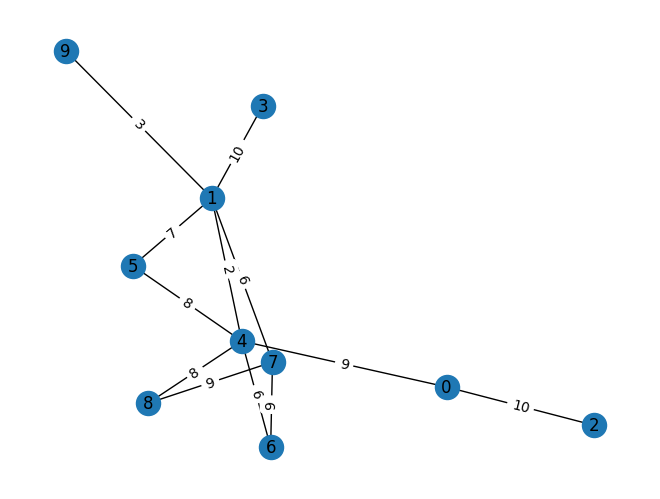

In [55]:
graph, G = createWeightedRandomGraph(10, 25,1,10, 346)
pos = nx.spring_layout(G)
elabels=nx.get_edge_attributes(G, "weight")
nx.draw(G, with_labels=True, pos = pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels=elabels)
Prim_yo(graph, 0)


In [56]:
import heapq as hq

def prim(graph, n0=0):
    mst = []
    size = len(graph)
    visited = [False]*size
    visited[n0] = True

    pq = []

    for i in range(size):
        if graph[n0][i] is not None:
            hq.heappush(pq, (graph[n0][i], n0, i))
    
    while len(mst) < size -1:
        w, n1, n2 = hq.heappop(pq)

        if visited[n1] != visited[n2]:
            mst.append((n1,n2,w))
            n = n1 if not visited[n1] else n2
            visited[n] = True
        
            for i in range(size):
                if graph[n][i] is not None and not visited[i]:
                    hq.heappush(pq, (graph[n][i], n, i))
    return mst
        

61

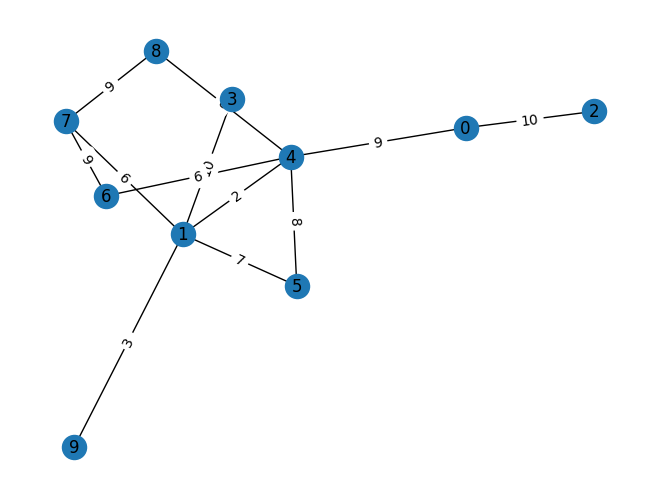

In [64]:
graph, G = createWeightedRandomGraph(10, 25,1,10, 346)
pos = nx.spring_layout(G)
elabels=nx.get_edge_attributes(G, "weight")
nx.draw(G, with_labels=True, pos = pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels=elabels)
mst = prim(graph, 0)
sum = 0
for e in mst:
    sum = sum + e[2]
sum

Kruskal's Algorithm

In [67]:
def findLeader(parents, x):
    while x != parents[x]:
        x = parents[x]
    return x

parents = [1,5,3,3,5,5]
for i in range(len(parents)):
    print(findLeader(parents, i))

5
5
3
3
5
5


In [68]:
def join(parents, rankings, i, j):
    leaderI = findLeader(parents, i)
    leaderJ = findLeader(parents, j)

    if leaderJ == leaderI:
        return False

    if rankings[leaderI] > rankings[leaderJ] or leaderI > leaderJ:
        rankings[leaderI] += rankings[leaderJ]
        parents[leaderJ] = leaderI
    else:
        rankings[leaderJ] += rankings[leaderI]
        parents[leaderI] = leaderJ

In [77]:
def Kruskal(graph):
    edges = []
    mst = []
    size = len(graph)

    for i in range(size):
        for j in range(size):
            if graph[i][j] is not None:
                edges.append((i,j,graph[i][j]))

    parents = list(range(size))
    rankings = [1]*size
    edges.sort(key=lambda x : x[2])

    while len(mst) < size - 1 :
        print(edges)
        print(mst)
        n1, n2, w = edges.pop()
        if join(parents, rankings, n1, n2):
            mst.append((n1, n2, w))

    return mst

[(1, 4, 2), (4, 1, 2), (1, 9, 3), (9, 1, 3), (1, 7, 6), (4, 6, 6), (6, 4, 6), (7, 1, 6), (1, 5, 7), (5, 1, 7), (4, 5, 8), (4, 8, 8), (5, 4, 8), (8, 4, 8), (0, 4, 9), (4, 0, 9), (6, 7, 9), (7, 6, 9), (7, 8, 9), (8, 7, 9), (0, 2, 10), (1, 3, 10), (2, 0, 10), (3, 1, 10)]
[]
[(1, 4, 2), (4, 1, 2), (1, 9, 3), (9, 1, 3), (1, 7, 6), (4, 6, 6), (6, 4, 6), (7, 1, 6), (1, 5, 7), (5, 1, 7), (4, 5, 8), (4, 8, 8), (5, 4, 8), (8, 4, 8), (0, 4, 9), (4, 0, 9), (6, 7, 9), (7, 6, 9), (7, 8, 9), (8, 7, 9), (0, 2, 10), (1, 3, 10), (2, 0, 10)]
[]
[(1, 4, 2), (4, 1, 2), (1, 9, 3), (9, 1, 3), (1, 7, 6), (4, 6, 6), (6, 4, 6), (7, 1, 6), (1, 5, 7), (5, 1, 7), (4, 5, 8), (4, 8, 8), (5, 4, 8), (8, 4, 8), (0, 4, 9), (4, 0, 9), (6, 7, 9), (7, 6, 9), (7, 8, 9), (8, 7, 9), (0, 2, 10), (1, 3, 10)]
[]
[(1, 4, 2), (4, 1, 2), (1, 9, 3), (9, 1, 3), (1, 7, 6), (4, 6, 6), (6, 4, 6), (7, 1, 6), (1, 5, 7), (5, 1, 7), (4, 5, 8), (4, 8, 8), (5, 4, 8), (8, 4, 8), (0, 4, 9), (4, 0, 9), (6, 7, 9), (7, 6, 9), (7, 8, 9), (8, 7, 9),

IndexError: pop from empty list

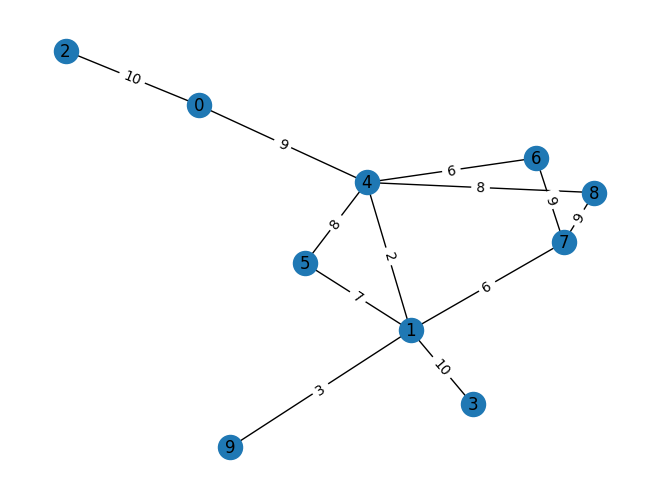

In [78]:
graph, G = createWeightedRandomGraph(10, 25,1,10, 346)
pos = nx.spring_layout(G)
elabels=nx.get_edge_attributes(G, "weight")
nx.draw(G, with_labels=True, pos = pos)
nx.draw_networkx_edge_labels(G,pos, edge_labels=elabels)
mst = Kruskal(graph)
